# TriNet

https://arxiv.org/pdf/1703.07737.pdf

In [1]:
import numpy as np
np.random.seed(100)

import matplotlib.pyplot as plt
import time
import os
%matplotlib inline

from keras.callbacks import LearningRateScheduler, History

Using TensorFlow backend.


In [2]:
# import sys
# sys.path.insert(0, '..')
# sys.path.insert(0, '../src/')

# import evaluation_bk as evaluation
# import training_utils
# from src import TripletDataGenerator, TriNet, DataGenerator, TestingDataGenerator

# sys.path.insert(0, '../DenseNet/')
# import densenet

In [3]:
# training.set_gpu_memory_fraction(0.5)

In [4]:
import sys
sys.path.insert(0, '/home/gong/research/open-reid/')
import reid

### Load Data

In [5]:
cuhk03 = reid.datasets.CUHK03('/home/gong/research/data/')

Using downloaded file: /home/gong/research/data/raw/cuhk03_release.zip
Extracting zip file
CUHK03 dataset loaded
  subset   | # ids | # images
  ---------------------------
  train    |  1267 |    24336
  val      |   100 |     1927
  trainval |  1367 |    26263
  query    |   100 |     1930
  gallery  |   100 |     1930


In [20]:
import os
os.path.isfile('/home/gong/research/data/raw/cuhk03_release.zip')

True

In [4]:
P_param = 18
K_param = 4
img_dim = (256,128,3)

In [7]:
data_gen = TripletDataGenerator('market', 'train', P=P_param, K=K_param, img_dim=img_dim, preprocess=True)

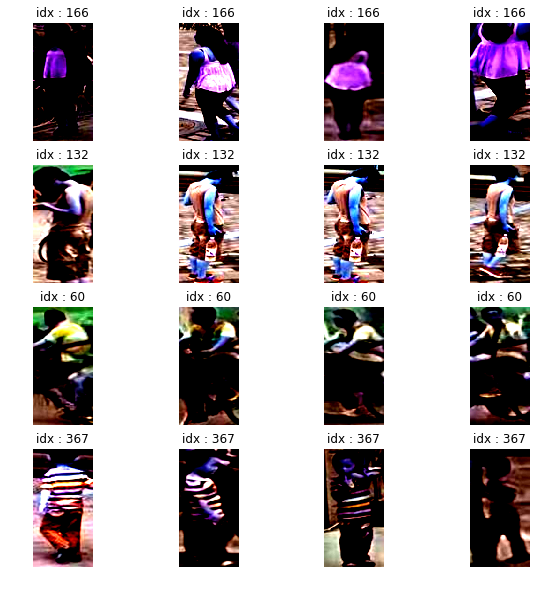

In [8]:
sample_batch, sample_labels = data_gen.sample(plot=True, height=4)

In [6]:
print(sample_batch.shape, sample_labels.shape)

(72, 256, 128, 3) (72, 1)


### Define Learning Rate Schedule

In [7]:
epochs = 10
steps_per_epoch = 100

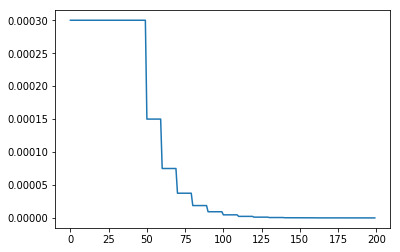

In [8]:
lr = []
for era in range(1,21):
    for j in range(10):
        lr.append(training.step_decay_cont(epochs, era)(j))
plt.plot(np.arange(200), lr)

### Train Model

In [9]:
model = TriNet(P_param=P_param, K_param=K_param, img_dim=img_dim)

Weights for the model were loaded successfully
margin 0.2


In [10]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 64, 64)  9408        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 64, 64)  256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 128, 64, 64)  0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_poolin

In [ ]:
history = History()
for era in range(1,16):
    iterations = era * epochs * steps_per_epoch
    lrate = LearningRateScheduler(training.step_decay_cont(epochs, era))

    print( 'era, ' + str(era))

    model.fit_generator(data_gen,
                         steps_per_epoch=steps_per_epoch,
                         epochs=epochs,
                         callbacks=[history, lrate])

    path = training.save_weights(model, it=iterations, root='trinet_P18K4')

    print(evaluation.get_score(model, shape=(256,128)))

era, 1
Epoch 1/10
100/100 [==============================] - 69s 694ms/step - loss: 1082.4622
Epoch 2/10
100/100 [==============================] - 36s 365ms/step - loss: 501.5510
Epoch 3/10
100/100 [==============================] - 36s 365ms/step - loss: 255.3556
Epoch 4/10
100/100 [==============================] - 37s 365ms/step - loss: 167.3943
Epoch 5/10
100/100 [==============================] - 37s 366ms/step - loss: 145.6326
Epoch 6/10
100/100 [==============================] - 36s 365ms/step - loss: 111.1149
Epoch 7/10
 20/100 [=====>........................] - ETA: 29s - loss: 83.5925